In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import sklearn
from sklearn.model_selection import KFold
from matplotlib import rcParams
import joblib
import cartopy.crs as ccrs
from sklearn.metrics import r2_score
import glob
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [6]:
results_dict = joblib.load('./data/results/models_lag2_5planes_60NS_all_models_final.pkl')

In [9]:
model_list = ['ACCESS1-0',
 'ACCESS1-3',
 'ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'CAMS-CSM1-0',
 'CanESM5',
 'CESM2_',
 'CESM2-WACCM',
 'FGOALS-f3-L',
 'GFDL-CM3',
 'GISS-E2-1-G',
 'GISS-E2-1-H',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'INM-CM4-8',
 'INM-CM5-0',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MPI-ESM-LR',
 'MPI-ESM-MR',
 'MPI-ESM-P',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'UKESM1-0-LL']
model_list_labels = ['ACCESS1-0',
 'ACCESS1-3',
 'ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'CAMS-CSM1-0',
 'CanESM5',
 'CESM2',
 'CESM2-WACCM',
 'FGOALS-f3-L',
 'GFDL-CM3',
 'GISS-E2-1-G',
 'GISS-E2-1-H',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'INM-CM4-8',
 'INM-CM5-0',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MPI-ESM-LR',
 'MPI-ESM-MR',
 'MPI-ESM-P',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'UKESM1-0-LL']

In [10]:
len(model_list)

27

In [11]:
nt_train=444
la=6
lb=30
era_ta = netCDF4.Dataset('./data/cmip/ta/ta_ERA5_1984_01_2020_12.nc')['t'][:nt_train,:,la:lb,:]
era_level = netCDF4.Dataset('./data/cmip/ta/ta_ERA5_1984_01_2020_12.nc')['level'][:]
era_lat = netCDF4.Dataset('./data/cmip/ta/ta_ERA5_1984_01_2020_12.nc')['lat'][la:lb]
era_lon = netCDF4.Dataset('./data/cmip/ta/ta_ERA5_1984_01_2020_12.nc')['lon'][:]

ACCESS1-0
ACCESS1-3
ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
CAMS-CSM1-0
CanESM5
CESM2_
CESM2-WACCM
FGOALS-f3-L
GFDL-CM3
GISS-E2-1-G
GISS-E2-1-H
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8


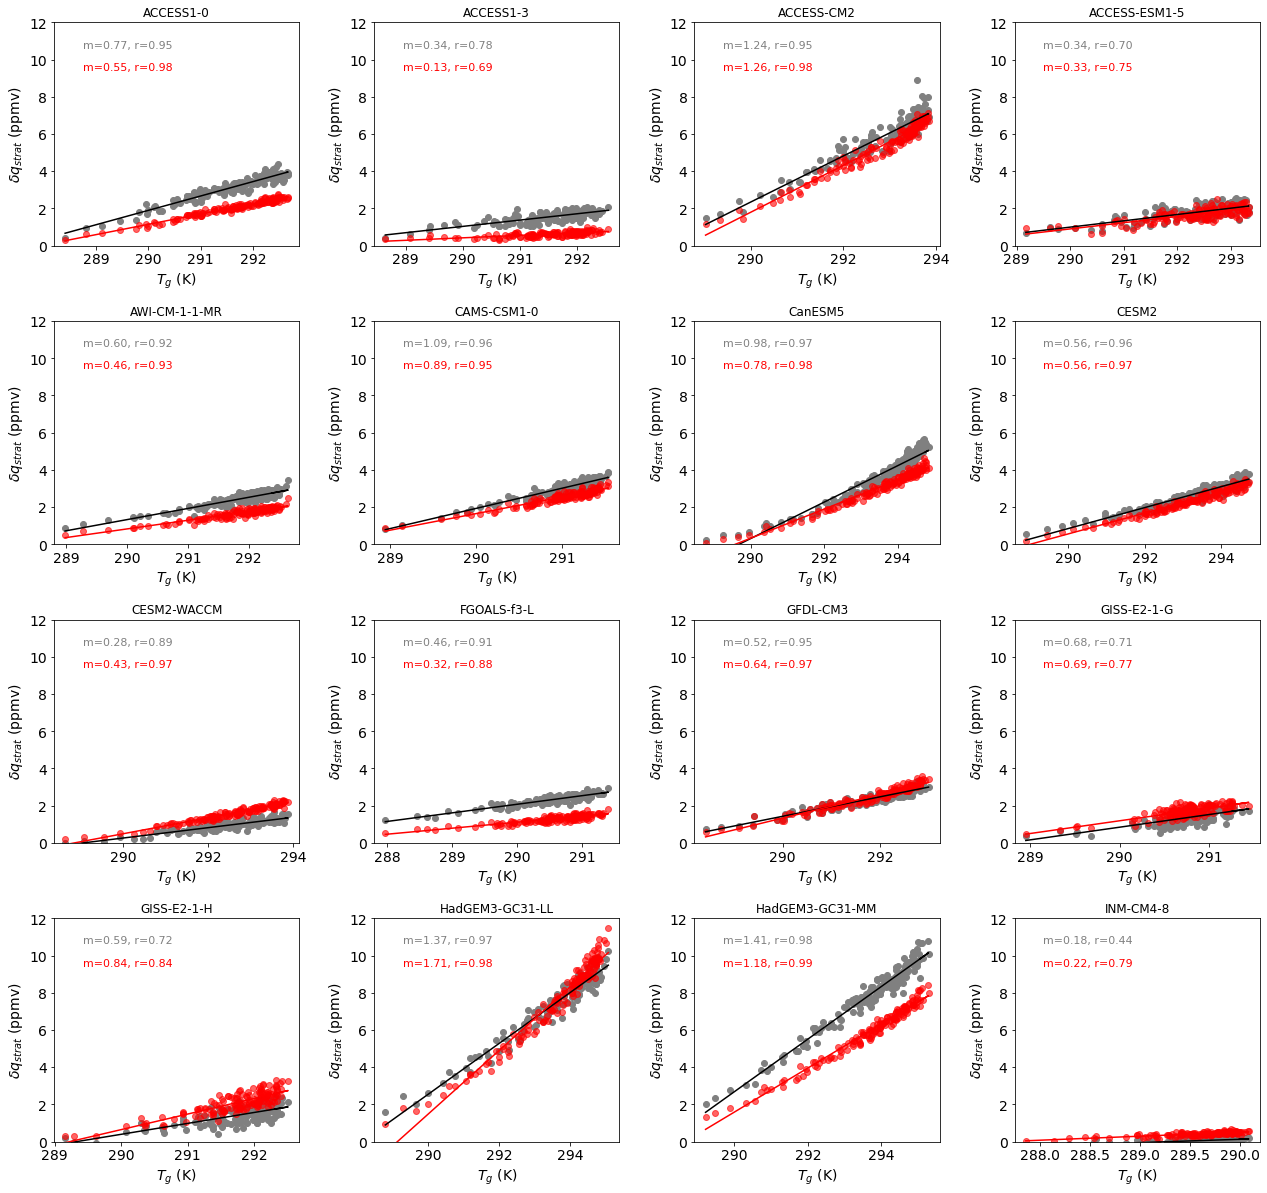

In [16]:
import matplotlib.patches
matplotlib.rcParams.update({'font.size': 14})
nrows=4
ncols=4
nr_planes=7
nr_models = len(model_list)
nr_lat = era_ta.shape[2]
nr_lon = era_ta.shape[3]
nt_train = era_ta.shape[0]
level_selected=1
lag=2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(30,30))
axs=axs.flatten()
for modeli in range(0,16):
    print(model_list[modeli])
    regr_model = results_dict[model_list[modeli]][0].best_estimator_
    nt_4xco2 = 1800
    X_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/ta/ta*'+model_list[modeli]+'*historical*.nc')[0])['ta'][:nt_train,1:nr_planes-1,la:lb,:]
    level_selected=1
    Y_raw_pi = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*piControl*.nc')[0])['hus'][:1200,level_selected,0,0]*1e6/0.6213
    Y_raw_pi_mean = np.mean(Y_raw_pi)
    Y_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*historical*.nc')[0])['hus'][:nt_train,level_selected,0,0]*1e6/0.6213
    Y_raw_hist_mean = np.mean(Y_raw_hist)
    X_raw_hist = X_raw_hist.reshape(nt_train,nr_lon*nr_lat*(nr_planes-2))
    X_gg_hist= X_raw_hist
    X_lag_hist = np.hstack((X_gg_hist[lag:,:],X_gg_hist[lag-1:-1,:],X_gg_hist[lag-2:-2,:]))
    scaler_hist = StandardScaler()
    x_scaler_hist = scaler_hist.fit(X_lag_hist[:nt_train-lag,:])
    Y_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*4xCO2*.nc')[0])['hus'][:nt_4xco2,level_selected,0,0]*1e6/0.6213
    nt_4xco2 = Y_raw_4xco2.shape[0]
    X_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/ta/ta*'+model_list[modeli]+'*4xCO2*.nc')[0])['ta'][:nt_4xco2,1:nr_planes-1,la:lb,:]
    X_raw_4xco2 = X_raw_4xco2.reshape(nt_4xco2,nr_lon*nr_lat*(nr_planes-2))
    X_gg_4xco2 = X_raw_4xco2
    X_lag_4xco2 = np.hstack((X_gg_4xco2[lag:,:],X_gg_4xco2[lag-1:-1,:],X_gg_4xco2[lag-2:-2,:]))
    X_lag_4xco2_norm = x_scaler_hist.transform(X_lag_4xco2)
    tas_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/tas/tas_global_mean/tas*'+model_list[modeli]+'*4xCO2*.nc')[0])['tas'][:nt_4xco2,0,0]
    tas_4xco2_am = np.empty((int((tas_4xco2.shape[0]-12)/12)))#     X_lag_4xco2_norm_era5 = X_lag_4xco2_norm*np.sqrt(x_scaler_hist.var_)/np.sqrt(x_scaler_era5.var_)
    y_4xco2_pred = np.exp(regr_model.predict(X_lag_4xco2_norm))-np.exp(regr_model.intercept_)
    y_pred_am = np.empty((int((nt_4xco2/12)-1)))
    y_true_am = np.empty((int((nt_4xco2/12)-1)))
    for i in np.arange(12,nt_4xco2,12):
        y_pred_am[int(i/12)-1] = np.mean(y_4xco2_pred[i-lag:i-lag+12])
        y_true_am[int(i/12)-1] = np.mean(Y_raw_4xco2[i:i+12])
        tas_4xco2_am[int(i/12)-1] = np.mean(tas_4xco2[i:i+12],axis=0)
    res_mm_true_am = stats.linregress(tas_4xco2_am[:],y_true_am[:])
    axs[modeli].scatter(tas_4xco2_am[:],y_true_am[:]-Y_raw_pi_mean,color='gray')
    axs[modeli].plot(tas_4xco2_am[:],res_mm_true_am.intercept - Y_raw_pi_mean + res_mm_true_am.slope*tas_4xco2_am[:],color='k')
    axs[modeli].text(0.3,0.9,'m='+str("{:.2f}".format(round(res_mm_true_am.slope,2)))+', r='+str("{:.2f}".format(round(res_mm_true_am.rvalue,2))),horizontalalignment='center', verticalalignment='center', transform=axs[modeli].transAxes,size=11,color='gray')
    res_mm_pred_am = stats.linregress(tas_4xco2_am[:],y_pred_am[:])
    axs[modeli].scatter(tas_4xco2_am[:],y_pred_am[:],color='red',alpha=0.6)
    axs[modeli].plot(tas_4xco2_am[:],res_mm_pred_am.intercept + res_mm_pred_am.slope*tas_4xco2_am[:],color='r')
    axs[modeli].text(0.3,0.8,'m='+str("{:.2f}".format(round(res_mm_pred_am.slope,2)))+', r='+str("{:.2f}".format(round(res_mm_pred_am.rvalue,2))),horizontalalignment='center', verticalalignment='center', transform=axs[modeli].transAxes, size=11, color='r')    
    axs[modeli].set_xlabel('$T_g$ (K)')
    axs[modeli].set_ylabel('$\delta q_{strat}$ (ppmv)')
    axs[modeli].set_title(model_list_labels[modeli],size=12)
    axs[modeli].set_ylim(0,12)
fig.tight_layout(rect=[0.4, 0.4, 1, 0.96])
plt.show()

INM-CM5-0
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MPI-ESM-LR
MPI-ESM-MR
MPI-ESM-P
MRI-ESM2-0
NESM3
NorESM2-LM
NorESM2-MM
UKESM1-0-LL


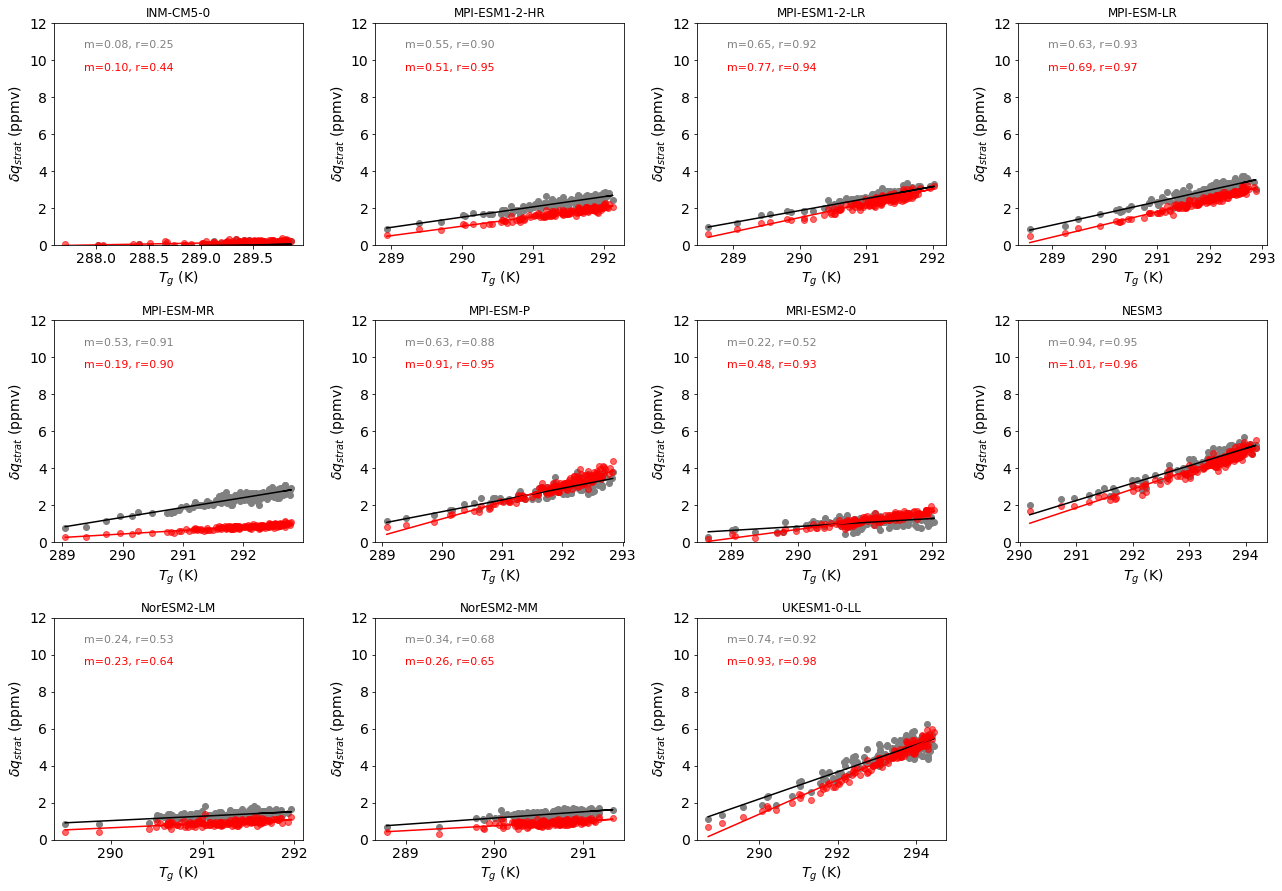

In [17]:
import matplotlib.patches
matplotlib.rcParams.update({'font.size': 14})
nrows=3
ncols=4
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(30,22.5))
axs=axs.flatten()
for modeli in range(16,nr_models):
    print(model_list[modeli])
    regr_model = results_dict[model_list[modeli]][0].best_estimator_
    nt_4xco2 = 1800
    X_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/ta/ta*'+model_list[modeli]+'*historical*.nc')[0])['ta'][:nt_train,1:nr_planes-1,la:lb,:]
    level_selected=1
    Y_raw_pi = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*piControl*.nc')[0])['hus'][:1200,level_selected,0,0]*1e6/0.6213
    Y_raw_pi_mean = np.mean(Y_raw_pi)
    Y_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*historical*.nc')[0])['hus'][:nt_train,level_selected,0,0]*1e6/0.6213
    Y_raw_hist_mean = np.mean(Y_raw_hist)
    X_raw_hist = X_raw_hist.reshape(nt_train,nr_lon*nr_lat*(nr_planes-2))
    X_gg_hist= X_raw_hist
    X_lag_hist = np.hstack((X_gg_hist[lag:,:],X_gg_hist[lag-1:-1,:],X_gg_hist[lag-2:-2,:]))
    scaler_hist = StandardScaler()
    x_scaler_hist = scaler_hist.fit(X_lag_hist[:nt_train-lag,:])
    Y_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*4xCO2*.nc')[0])['hus'][:nt_4xco2,level_selected,0,0]*1e6/0.6213
    nt_4xco2 = Y_raw_4xco2.shape[0]
    X_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/ta/ta*'+model_list[modeli]+'*4xCO2*.nc')[0])['ta'][:nt_4xco2,1:nr_planes-1,la:lb,:]
    X_raw_4xco2 = X_raw_4xco2.reshape(nt_4xco2,nr_lon*nr_lat*(nr_planes-2))
    X_gg_4xco2 = X_raw_4xco2
    X_lag_4xco2 = np.hstack((X_gg_4xco2[lag:,:],X_gg_4xco2[lag-1:-1,:],X_gg_4xco2[lag-2:-2,:]))
    X_lag_4xco2_norm = x_scaler_hist.transform(X_lag_4xco2)
    tas_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/tas/tas_global_mean/tas*'+model_list[modeli]+'*4xCO2*.nc')[0])['tas'][:nt_4xco2,0,0]
    tas_4xco2_am = np.empty((int((tas_4xco2.shape[0]-12)/12)))
    y_4xco2_pred = np.exp(regr_model.predict(X_lag_4xco2_norm))-np.exp(regr_model.intercept_)
    y_pred_am = np.empty((int((nt_4xco2/12)-1)))
    y_true_am = np.empty((int((nt_4xco2/12)-1)))
    for i in np.arange(12,nt_4xco2,12):
        y_pred_am[int(i/12)-1] = np.mean(y_4xco2_pred[i-lag:i-lag+12])
        y_true_am[int(i/12)-1] = np.mean(Y_raw_4xco2[i:i+12])
        tas_4xco2_am[int(i/12)-1] = np.mean(tas_4xco2[i:i+12],axis=0)
    res_mm_true_am = stats.linregress(tas_4xco2_am[:],y_true_am[:])
    model_nr=16
    axs[modeli-model_nr].scatter(tas_4xco2_am[:],y_true_am[:]-Y_raw_pi_mean,color='gray')
    axs[modeli-model_nr].plot(tas_4xco2_am[:],res_mm_true_am.intercept - Y_raw_pi_mean + res_mm_true_am.slope*tas_4xco2_am[:],color='k')
    axs[modeli-model_nr].text(0.3,0.9,'m='+str("{:.2f}".format(round(res_mm_true_am.slope,2)))+', r='+str("{:.2f}".format(round(res_mm_true_am.rvalue,2))),horizontalalignment='center', verticalalignment='center', transform=axs[modeli-model_nr].transAxes,size=11,color='gray')
    res_mm_pred_am = stats.linregress(tas_4xco2_am[:],y_pred_am[:])
    axs[modeli-model_nr].scatter(tas_4xco2_am[:],y_pred_am[:],color='red',alpha=0.6)
    axs[modeli-model_nr].plot(tas_4xco2_am[:],res_mm_pred_am.intercept + res_mm_pred_am.slope*tas_4xco2_am[:],color='r')
    axs[modeli-model_nr].text(0.3,0.8,'m='+str("{:.2f}".format(round(res_mm_pred_am.slope,2)))+', r='+str("{:.2f}".format(round(res_mm_pred_am.rvalue,2))),horizontalalignment='center', verticalalignment='center', transform=axs[modeli-model_nr].transAxes, size=11, color='r')    
    axs[modeli-model_nr].set_xlabel('$T_g$ (K)')
    axs[modeli-model_nr].set_ylabel('$\delta q_{strat}$ (ppmv)')
    axs[modeli-model_nr].set_title(model_list_labels[modeli],size=12)
    axs[modeli-model_nr].set_ylim(0,12)
fig.delaxes(axs[11])
fig.tight_layout(rect=[0.4, 0.4, 1, 0.96])
plt.show()

ACCESS1-0
ACCESS1-3
ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
CAMS-CSM1-0
CanESM5
CESM2_
CESM2-WACCM
FGOALS-f3-L
GFDL-CM3
GISS-E2-1-G
GISS-E2-1-H
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8


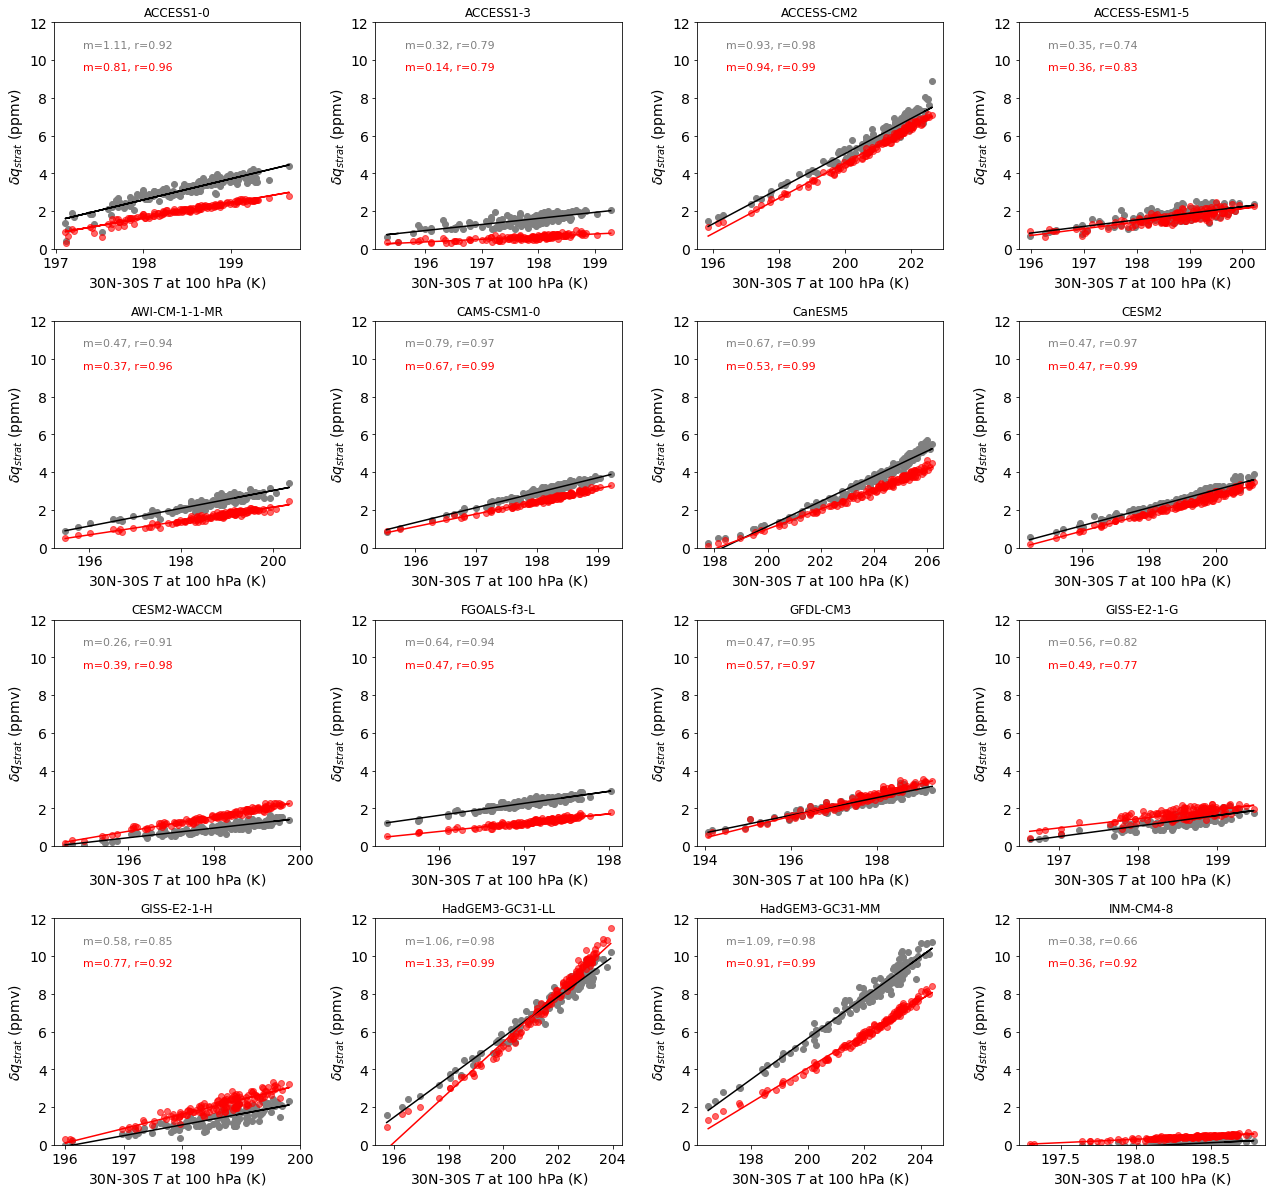

In [19]:
### now normalised by 20N-20S upper tropospheric warming, cf. Supplementary Figures 6 and 7
import matplotlib.patches
matplotlib.rcParams.update({'font.size': 14})
nrows=4
ncols=4
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(30,30))
axs=axs.flatten()
for modeli in range(0,16):
    print(model_list[modeli])
    regr_model = results_dict[model_list[modeli]][0].best_estimator_
    nt_4xco2 = 1800
    X_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/ta/ta*'+model_list[modeli]+'*historical*.nc')[0])['ta'][:nt_train,1:nr_planes-1,la:lb,:]
    level_selected=1
    Y_raw_pi = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*piControl*.nc')[0])['hus'][:1200,level_selected,0,0]*1e6/0.6213
    Y_raw_pi_mean = np.mean(Y_raw_pi)
    Y_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*historical*.nc')[0])['hus'][:nt_train,level_selected,0,0]*1e6/0.6213
    Y_raw_hist_mean = np.mean(Y_raw_hist)
    X_raw_hist = X_raw_hist.reshape(nt_train,nr_lon*nr_lat*(nr_planes-2))
    X_gg_hist= X_raw_hist
    X_lag_hist = np.hstack((X_gg_hist[lag:,:],X_gg_hist[lag-1:-1,:],X_gg_hist[lag-2:-2,:]))
    scaler_hist = StandardScaler()
    x_scaler_hist = scaler_hist.fit(X_lag_hist[:nt_train-lag,:])
    Y_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*4xCO2*.nc')[0])['hus'][:nt_4xco2,level_selected,0,0]*1e6/0.6213
    nt_4xco2 = Y_raw_4xco2.shape[0]
    X_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/ta/ta*'+model_list[modeli]+'*4xCO2*.nc')[0])['ta'][:nt_4xco2,1:nr_planes-1,la:lb,:]
    X_raw_4xco2 = X_raw_4xco2.reshape(nt_4xco2,nr_lon*nr_lat*(nr_planes-2))
    X_gg_4xco2 = X_raw_4xco2
    X_lag_4xco2 = np.hstack((X_gg_4xco2[lag:,:],X_gg_4xco2[lag-1:-1,:],X_gg_4xco2[lag-2:-2,:]))
    X_lag_4xco2_norm = x_scaler_hist.transform(X_lag_4xco2)
    tas_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/ta_20NS_average/20NS*'+model_list[modeli]+'*4xCO2*.nc')[0])['ta'][:nt_4xco2,0,0]
    tas_4xco2_am = np.empty((int((tas_4xco2.shape[0]-12)/12)))
    y_4xco2_pred = np.exp(regr_model.predict(X_lag_4xco2_norm))-np.exp(regr_model.intercept_)
    y_pred_am = np.empty((int((nt_4xco2/12)-1)))
    y_true_am = np.empty((int((nt_4xco2/12)-1)))
    for i in np.arange(12,nt_4xco2,12):
        y_pred_am[int(i/12)-1] = np.mean(y_4xco2_pred[i-lag:i-lag+12])
        y_true_am[int(i/12)-1] = np.mean(Y_raw_4xco2[i:i+12])
        tas_4xco2_am[int(i/12)-1] = np.mean(tas_4xco2[i:i+12],axis=0)
    res_mm_true_am = stats.linregress(tas_4xco2_am[:],y_true_am[:])
    axs[modeli].scatter(tas_4xco2_am[:],y_true_am[:]-Y_raw_pi_mean,color='gray')
    axs[modeli].plot(tas_4xco2_am[:],res_mm_true_am.intercept - Y_raw_pi_mean + res_mm_true_am.slope*tas_4xco2_am[:],color='k')
    axs[modeli].text(0.3,0.9,'m='+str("{:.2f}".format(round(res_mm_true_am.slope,2)))+', r='+str("{:.2f}".format(round(res_mm_true_am.rvalue,2))),horizontalalignment='center', verticalalignment='center', transform=axs[modeli].transAxes,size=11,color='gray')
    res_mm_pred_am = stats.linregress(tas_4xco2_am[:],y_pred_am[:])
    axs[modeli].scatter(tas_4xco2_am[:],y_pred_am[:],color='red',alpha=0.6)
    axs[modeli].plot(tas_4xco2_am[:],res_mm_pred_am.intercept + res_mm_pred_am.slope*tas_4xco2_am[:],color='r')
    axs[modeli].text(0.3,0.8,'m='+str("{:.2f}".format(round(res_mm_pred_am.slope,2)))+', r='+str("{:.2f}".format(round(res_mm_pred_am.rvalue,2))),horizontalalignment='center', verticalalignment='center', transform=axs[modeli].transAxes, size=11, color='r')    
    axs[modeli].set_xlabel('30N-30S $T$ at 100 hPa (K)')
    axs[modeli].set_ylabel('$\delta q_{strat}$ (ppmv)')
    axs[modeli].set_title(model_list_labels[modeli],size=12)
    axs[modeli].set_ylim(0,12)
fig.tight_layout(rect=[0.4, 0.4, 1, 0.96])
plt.show()

INM-CM5-0
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MPI-ESM-LR
MPI-ESM-MR
MPI-ESM-P
MRI-ESM2-0
NESM3
NorESM2-LM
NorESM2-MM
UKESM1-0-LL


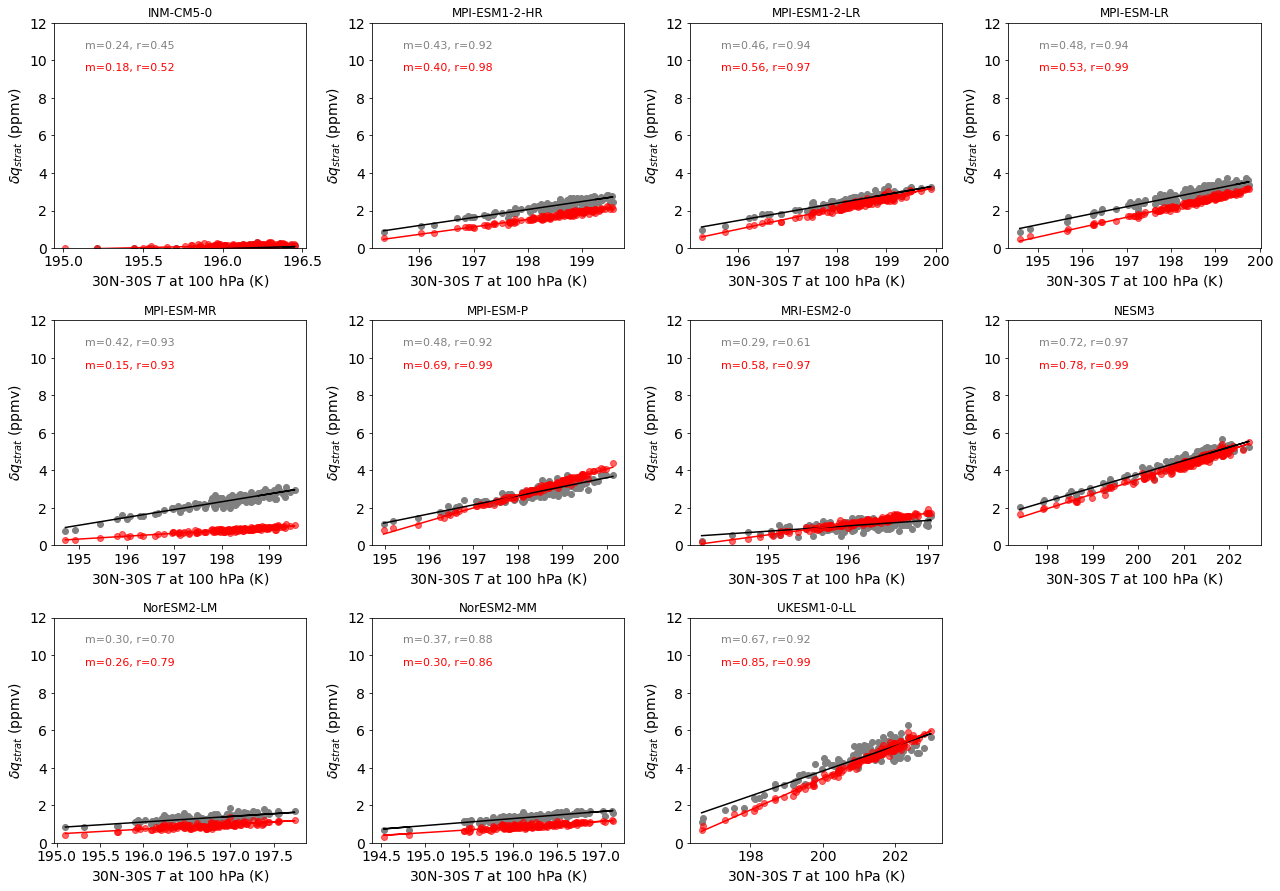

In [20]:
import matplotlib.patches
matplotlib.rcParams.update({'font.size': 14})
nrows=3
ncols=4
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(30,22.5))
axs=axs.flatten()
for modeli in range(16,nr_models):
    print(model_list[modeli])
    regr_model = results_dict[model_list[modeli]][0].best_estimator_
    nt_4xco2 = 1800
    X_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/ta/ta*'+model_list[modeli]+'*historical*.nc')[0])['ta'][:nt_train,1:nr_planes-1,la:lb,:]
    level_selected=1
    Y_raw_pi = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*piControl*.nc')[0])['hus'][:1200,level_selected,0,0]*1e6/0.6213
    Y_raw_pi_mean = np.mean(Y_raw_pi)
    Y_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*historical*.nc')[0])['hus'][:nt_train,level_selected,0,0]*1e6/0.6213
    Y_raw_hist_mean = np.mean(Y_raw_hist)
    X_raw_hist = X_raw_hist.reshape(nt_train,nr_lon*nr_lat*(nr_planes-2))
    X_gg_hist= X_raw_hist
    X_lag_hist = np.hstack((X_gg_hist[lag:,:],X_gg_hist[lag-1:-1,:],X_gg_hist[lag-2:-2,:]))
    scaler_hist = StandardScaler()
    x_scaler_hist = scaler_hist.fit(X_lag_hist[:nt_train-lag,:])
    Y_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list[modeli]+'*4xCO2*.nc')[0])['hus'][:nt_4xco2,level_selected,0,0]*1e6/0.6213
    nt_4xco2 = Y_raw_4xco2.shape[0]
    X_raw_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/ta/ta*'+model_list[modeli]+'*4xCO2*.nc')[0])['ta'][:nt_4xco2,1:nr_planes-1,la:lb,:]
    X_raw_4xco2 = X_raw_4xco2.reshape(nt_4xco2,nr_lon*nr_lat*(nr_planes-2))
    X_gg_4xco2 = X_raw_4xco2
    X_lag_4xco2 = np.hstack((X_gg_4xco2[lag:,:],X_gg_4xco2[lag-1:-1,:],X_gg_4xco2[lag-2:-2,:]))
    X_lag_4xco2_norm = x_scaler_hist.transform(X_lag_4xco2)
    tas_4xco2 = netCDF4.Dataset(glob.glob('./data/cmip/ta_20NS_average/20NS*'+model_list[modeli]+'*4xCO2*.nc')[0])['ta'][:nt_4xco2,0,0]
    tas_4xco2_am = np.empty((int((tas_4xco2.shape[0]-12)/12)))#     X_lag_4xco2_norm_era5 = X_lag_4xco2_norm*np.sqrt(x_scaler_hist.var_)/np.sqrt(x_scaler_era5.var_)
    y_4xco2_pred = np.exp(regr_model.predict(X_lag_4xco2_norm))-np.exp(regr_model.intercept_)
    y_pred_am = np.empty((int((nt_4xco2/12)-1)))
    y_true_am = np.empty((int((nt_4xco2/12)-1)))
    for i in np.arange(12,nt_4xco2,12):
        y_pred_am[int(i/12)-1] = np.mean(y_4xco2_pred[i-lag:i-lag+12])
        y_true_am[int(i/12)-1] = np.mean(Y_raw_4xco2[i:i+12])
        tas_4xco2_am[int(i/12)-1] = np.mean(tas_4xco2[i:i+12],axis=0)
    res_mm_true_am = stats.linregress(tas_4xco2_am[:],y_true_am[:])
    model_nr=16
    axs[modeli-model_nr].scatter(tas_4xco2_am[:],y_true_am[:]-Y_raw_pi_mean,color='gray')
    axs[modeli-model_nr].plot(tas_4xco2_am[:],res_mm_true_am.intercept - Y_raw_pi_mean + res_mm_true_am.slope*tas_4xco2_am[:],color='k')
    axs[modeli-model_nr].text(0.3,0.9,'m='+str("{:.2f}".format(round(res_mm_true_am.slope,2)))+', r='+str("{:.2f}".format(round(res_mm_true_am.rvalue,2))),horizontalalignment='center', verticalalignment='center', transform=axs[modeli-model_nr].transAxes,size=11,color='gray')
    res_mm_pred_am = stats.linregress(tas_4xco2_am[:],y_pred_am[:])
    axs[modeli-model_nr].scatter(tas_4xco2_am[:],y_pred_am[:],color='red',alpha=0.6)
    axs[modeli-model_nr].plot(tas_4xco2_am[:],res_mm_pred_am.intercept + res_mm_pred_am.slope*tas_4xco2_am[:],color='r')
    axs[modeli-model_nr].text(0.3,0.8,'m='+str("{:.2f}".format(round(res_mm_pred_am.slope,2)))+', r='+str("{:.2f}".format(round(res_mm_pred_am.rvalue,2))),horizontalalignment='center', verticalalignment='center', transform=axs[modeli-model_nr].transAxes, size=11, color='r')    
    axs[modeli-model_nr].set_xlabel('30N-30S $T$ at 100 hPa (K)')
    axs[modeli-model_nr].set_ylabel('$\delta q_{strat}$ (ppmv)')
    axs[modeli-model_nr].set_title(model_list_labels[modeli],size=12)
    axs[modeli-model_nr].set_ylim(0,12)
fig.delaxes(axs[11])
fig.tight_layout(rect=[0.4, 0.4, 1, 0.96])
plt.show()